In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
plt.rc('figure', figsize=(10, 6))
from matplotlib import rcParams
rcParams['font.family'] = 'New Gulim'
rcParams['font.size'] = 10
rcParams['axes.unicode_minus'] = False

# 확률의 계산

## 동전 던지기

In [2]:
space = ['앞면', '뒷면']
event = ['앞면']

prob = lambda space, event : len(event) / len(space)
prob(space, event)

0.5

In [3]:
# 주사위 던지기
# 한번 던져서 3이 나올 확률

space = [1, 2, 3, 4, 5, 6]
event = [3]

prob = lambda space, event : len(event) / len(space)
prob(space, event)

0.16666666666666666

# 확률의 덧셈

## 주사위에서 짝수이거나 4보다 큰 수가 나올 확률 - 덧셈

In [4]:
space = {1, 2, 3, 4, 5, 6}
event_A = {2, 4, 6}
event_B = {5, 6}

In [5]:
합집합 = event_A | event_B
합집합

{2, 4, 5, 6}

In [6]:
합집합의_개수 = len(합집합)
전체경우의수 = len(space)

확률_1 = 합집합의_개수 / 전체경우의수
확률_1

0.6666666666666666


## 2이하이거나 5이상인 눈이 나올 확률

In [7]:
space = {1, 2, 3, 4, 5, 6}
event_A = {1, 2}
event_B = {5, 6}

In [8]:
합집합2 = event_A | event_B
합집합2

{1, 2, 5, 6}

In [9]:
합집합의_개수2 = len(합집합2)
전체경우의수 = len(space)

확률_2 = 합집합의_개수2 / 전체경우의수
확률_2

0.6666666666666666

# 확률의 교집합

주사위를 던져 짝수 & 2일 확률

In [10]:
sample_space = [1, 2, 3, 4, 5, 6]
event_A = [2, 4, 6]
event_B = [2]

P_A = len(event_A) / len(sample_space)        # A 일 확률
P_B = len(event_B) / len(sample_space)        # B 일 확률
P_B_and_A_ele = set(event_A) & set(event_B)   # 교집합의 원소
P_B_and_A_ele

{2}

In [11]:
P_B_and_A = len(P_B_and_A_ele) / len(sample_space)  # 교집합이 나올 확률
P_B_and_A

0.16666666666666666

In [12]:
# 조건부확률 : 짝수일 때 2가 나올 확률
# P(B|A) = P{B_and_A} / P(A)

P_B_given_A = P_B_and_A / P_A
P_B_given_A

0.3333333333333333

# 우도와 확률값

동전 10번 던지고, 8번 앞면이 나왔다.   
우도의 계산

In [13]:
n = 10
k = 8  # 앞면의 횟수

# 가설1 - 공정한 상태일 때
p1 = 0.5  # 앞면이 나올 확률 - 공정할 경우
from scipy.stats import binom
p1_liklihood = binom.pmf(k, n, p1)  # 조건, 총사건, 확률

p2 = 0.8
p2_liklihood = binom.pmf(k, n, p2) 

p1_liklihood, p2_liklihood

(np.float64(0.04394531250000005), np.float64(0.30198988799999993))

가설1의 경우 : 앞면이 8번 나올 확률은 4.4%   
가설1의 경우 : 아편이 8번 나올 확률은 30.2%   

앞면 8번 나오는 관측값은 p=0.8인 모델이 더 잘 설명한다. -> 우도가 크다.

# 기대값
x의 확룰들의 평균

In [14]:
x_values = [1, 2, 3]
p_x = [1/6, 3/6, 2/6]

exp_value = 0
# 기대값
for i in range(len(x_values)):
    exp_value += x_values[i] * p_x[i]
    
print(f'기대값 : {exp_value:.5f}')

기대값 : 2.16667


In [15]:
from scipy.stats import norm

mu = 0
sigma = 1

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, loc=mu, scale=sigma)

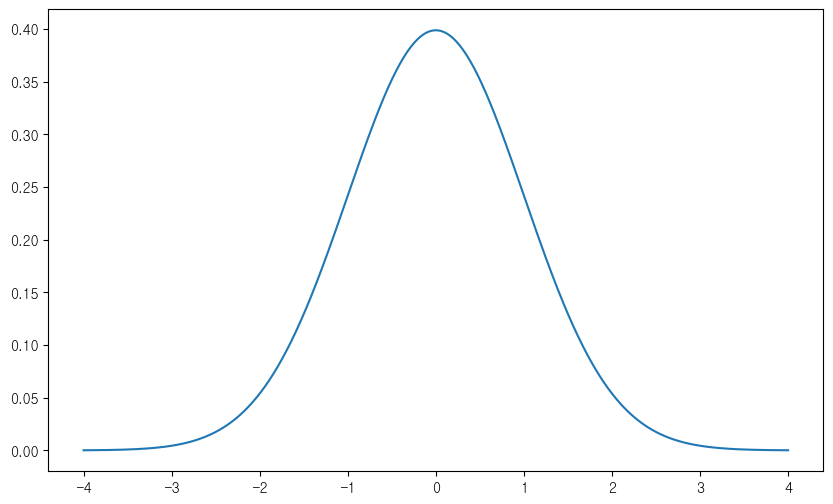

In [16]:
plt.plot(x, y)
plt.show()

# 표집분포

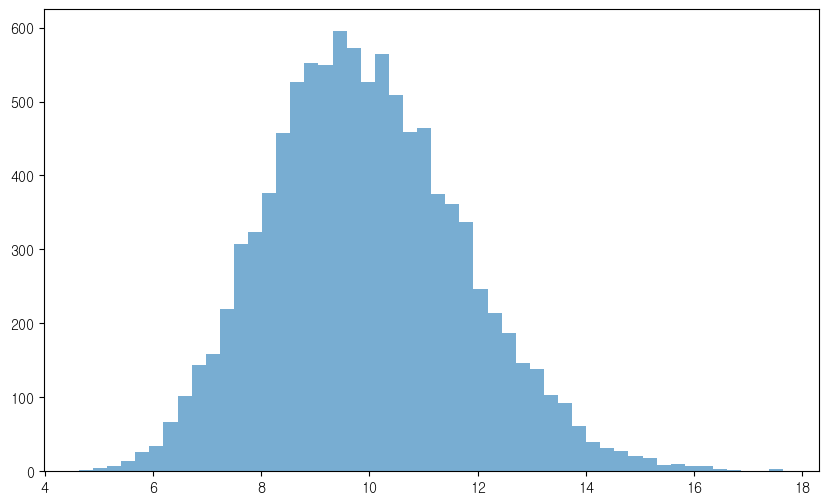

In [17]:
np.random.seed(0)
X_pop = np.random.exponential(scale=10, size=10000)
sample_mean = [np.mean(np.random.choice(X_pop, size=30)) for _ in range(10000)]

plt.hist(sample_mean, bins=50, alpha = 0.6)
plt.show()

# z 점수

In [18]:
mu = 100
sigma = 10

x1 = 110     # z 점수를 계산하려고 하는 원래 점수
x2 = 125    

# z점수 = 원점수 - 평균 / 표준편차
z_x1 = (x1 - mu) / sigma
z_x2 = (x2 - mu) / sigma

z_x1, z_x2

(1.0, 2.5)

z_x1 = 0.8413 -> 0.5 -> 0.3413   
z_x2 = 0.9938 -> 0.5 -> 0.4938

0.4938 - 0.3413 = 0.1525  15%

In [19]:
area_z_x1 = norm.cdf(z_x1) - norm.cdf(0)
area_z_x2 = norm.cdf(z_x2) - norm.cdf(0)

diff_area = area_z_x2 - area_z_x1
diff_area

np.float64(0.15244558860568092)

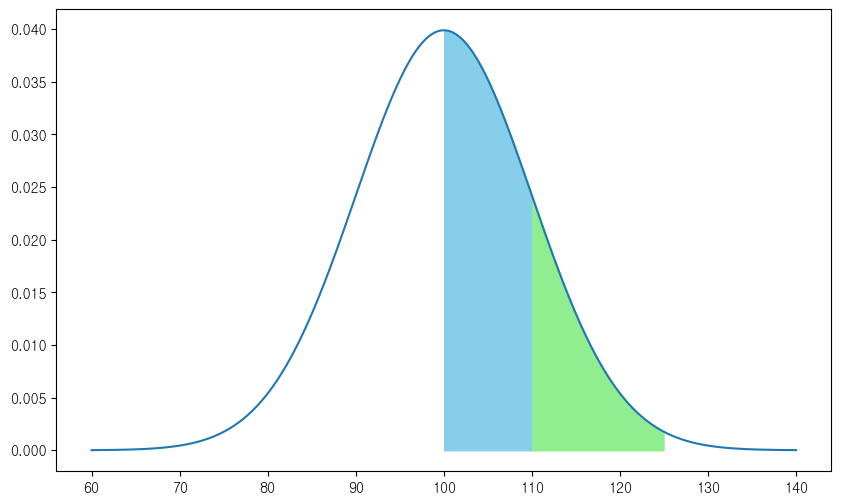

In [20]:
# 시각화
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
y = norm.pdf(x, mu, sigma)
plt.plot(x, y)
plt.fill_between(x, y, where=(x >= 100) & (x <= 110), color='skyblue')
plt.fill_between(x, y, where=(x > 110) & (x <= 125), color='lightgreen')
plt.show()